# Asteroid Size Prediction

To predict the asteroid size using various algorithms and find out the R2 Score. Fine tune the model to get best possible R2 Score.

Get the Asteroid Dataset using the following link

https://www.kaggle.com/datasets/basu369victor/prediction-of-asteroid-diameter?select=Asteroid_Updated.csv 

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/content/Asteroid_Updated.csv',sep=',')
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [ ]:
df.shape

(839714, 31)

Data Preprocessing

In [ ]:
#Renaming the columns
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

In [ ]:
new_columns_dict = {'name':'obj_name','a':'semi-major_axis(au)','e':'eccentricity',
                    'i':'x-y_inclination(deg)','om':'longitude_asc_node','w':'argument_perihelion',
                    'q':'perihelion_dist(au)','ad':'aphelion_dist(au)', 'per_y':'orbital_period',
                   'data_arc':'data_arc(d)','condition_code':'condition_code','n_obs_used':'n_obs_used',
                   'H':'abs_mag_para', 'neo':'near_earth_obj', 'pha':'physically_hazardous_asteroid',
                   'diameter':'diameter','extent':'axial_ellipsoid_dim(Km)','albedo':'geo_albedo',
                   'rot_per':'rot_per(h)','GM':'std_gravitational_para','BV':'bv_color_mag_diff',
                   'UB':'ub_color_mag_diff','IR':'ir_color_mag_diff','spec_B':'SMASSII_spec_tax_type',
                   'spec_T':'Tholen_spec_tax_type','G':'mag_slope_para','moid':'earth_min_oribit_inter_dist(au)',
                   'class':'class','n':'mean_motion(deg/d)','per':'orbital_period(d)','ma':'mean_anomaly(deg)'}

In [ ]:
df = df.rename(columns = new_columns_dict)
df.columns

Index(['obj_name', 'semi-major_axis(au)', 'eccentricity',
       'x-y_inclination(deg)', 'longitude_asc_node', 'argument_perihelion',
       'perihelion_dist(au)', 'aphelion_dist(au)', 'orbital_period',
       'data_arc(d)', 'condition_code', 'n_obs_used', 'abs_mag_para',
       'near_earth_obj', 'physically_hazardous_asteroid', 'diameter',
       'axial_ellipsoid_dim(Km)', 'geo_albedo', 'rot_per(h)',
       'std_gravitational_para', 'bv_color_mag_diff', 'ub_color_mag_diff',
       'ir_color_mag_diff', 'SMASSII_spec_tax_type', 'Tholen_spec_tax_type',
       'mag_slope_para', 'earth_min_oribit_inter_dist(au)', 'class',
       'mean_motion(deg/d)', 'orbital_period(d)', 'mean_anomaly(deg)'],
      dtype='object')

In [ ]:
#Missing values percentages at column level.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
eccentricity,0,0.000000
x-y_inclination(deg),0,0.000000
longitude_asc_node,0,0.000000
argument_perihelion,0,0.000000
perihelion_dist(au),0,0.000000
class,0,0.000000
n_obs_used,0,0.000000
orbital_period,1,0.000119
semi-major_axis(au),2,0.000238
mean_motion(deg/d),2,0.000238


In [ ]:
#Calculate the number of non-null diameters. Since Diameter is our targer variable and this supervised learning we can't have rows with Nulls.
valid_rows = df['diameter'].notnull().sum()
valid_rows

137636

In [ ]:
#Even if all rows with missing diameters are removed, there are a significant number of records to work with.
#Remove rows with missing diameter.
df = df.dropna(axis=0, subset=['diameter']) 

In [ ]:
#Missing values percentages at column level.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
diameter,0,0.000000
mean_motion(deg/d),0,0.000000
class,0,0.000000
earth_min_oribit_inter_dist(au),0,0.000000
orbital_period(d),0,0.000000
physically_hazardous_asteroid,0,0.000000
near_earth_obj,0,0.000000
n_obs_used,0,0.000000
condition_code,0,0.000000
mean_anomaly(deg),0,0.000000


In [ ]:
#Even after removing the missing diameter rows, there are still columns with more than half their values missing. These columns should be removed.
#List of columns to drop.
drop_list = ['rot_per(h)','SMASSII_spec_tax_type','obj_name',
             'bv_color_mag_diff','Tholen_spec_tax_type','ub_color_mag_diff','mag_slope_para',
             'axial_ellipsoid_dim(Km)','std_gravitational_para','ir_color_mag_diff']
df.drop(drop_list, axis=1, inplace=True)            

In [ ]:
df.shape

(137636, 21)

In [ ]:
#Missing values percentages at column level.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
semi-major_axis(au),0,0.000000
mean_motion(deg/d),0,0.000000
class,0,0.000000
earth_min_oribit_inter_dist(au),0,0.000000
diameter,0,0.000000
physically_hazardous_asteroid,0,0.000000
near_earth_obj,0,0.000000
orbital_period(d),0,0.000000
condition_code,0,0.000000
n_obs_used,0,0.000000


In [ ]:
# Filling the misssing values with mean of the feature...
df['data_arc(d)'] = df['data_arc(d)'].fillna((df['data_arc(d)'].mean()))

In [ ]:
df['abs_mag_para'] = df['abs_mag_para'].fillna((df['abs_mag_para'].mean()))

In [ ]:
df['geo_albedo'] = df['geo_albedo'].fillna((df['geo_albedo'].mean()))

In [ ]:
#Missing values percentages at column level.
missing= pd.concat([pd.isnull(df).sum(), 100 * pd.isnull(df).mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
semi-major_axis(au),0,0.0
mean_motion(deg/d),0,0.0
class,0,0.0
earth_min_oribit_inter_dist(au),0,0.0
geo_albedo,0,0.0
diameter,0,0.0
physically_hazardous_asteroid,0,0.0
near_earth_obj,0,0.0
abs_mag_para,0,0.0
orbital_period(d),0,0.0


In [ ]:
df.dtypes

semi-major_axis(au)                float64
eccentricity                       float64
x-y_inclination(deg)               float64
longitude_asc_node                 float64
argument_perihelion                float64
perihelion_dist(au)                float64
aphelion_dist(au)                  float64
orbital_period                     float64
data_arc(d)                        float64
condition_code                      object
n_obs_used                           int64
abs_mag_para                       float64
near_earth_obj                      object
physically_hazardous_asteroid       object
diameter                            object
geo_albedo                         float64
earth_min_oribit_inter_dist(au)    float64
class                               object
mean_motion(deg/d)                 float64
orbital_period(d)                  float64
mean_anomaly(deg)                  float64
dtype: object

In [ ]:
# Bringing in 'Object' features
df.select_dtypes('object').tail()

,condition_code,near_earth_obj,physically_hazardous_asteroid,diameter,class
797860,1,N,N,3.793,MBA
798077,2,N,N,2.696,MBA
798189,1,N,N,2.917,MBA
799752,2,N,N,3.271,MBA
810375,3,N,N,1.6,MBA


In [ ]:
df['diameter'].iloc[15]

'226\u2009'

In [ ]:
df['diameter'].iloc[14]

'231.689'

In [ ]:
df.at[15,'diameter']=226

In [ ]:
df['diameter'] = pd.to_numeric(df['diameter'])

In [ ]:
df.condition_code.unique()

array([0, 1, 3, 2, '0', '1', '2', '3', '4', '5', '9', '7', 5.0, 6.0, 4.0,
       7.0, 9.0, 8.0, '8', '6'], dtype=object)

In [ ]:
df['condition_code']=df['condition_code'].astype('int64')
df.condition_code.unique()

array([0, 1, 3, 2, 4, 5, 9, 7, 6, 8])

In [ ]:
#Explore the unique values of the object features.
df.select_dtypes('object').tail()

,near_earth_obj,physically_hazardous_asteroid,class
797860,N,N,MBA
798077,N,N,MBA
798189,N,N,MBA
799752,N,N,MBA
810375,N,N,MBA


In [ ]:
df['near_earth_obj'].value_counts()

N    136786
Y       850
Name: near_earth_obj, dtype: int64

In [ ]:
df['physically_hazardous_asteroid'].value_counts()

N    137415
Y       221
Name: physically_hazardous_asteroid, dtype: int64

In [ ]:
df['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [ ]:
df.shape

(137636, 21)

In [ ]:
df.describe()

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),orbital_period,data_arc(d),condition_code,n_obs_used,abs_mag_para,diameter,geo_albedo,earth_min_oribit_inter_dist(au),mean_motion(deg/d),orbital_period(d),mean_anomaly(deg)
count,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,137636.000000,1.376360e+05,137636.000000
mean,2.814613,0.145485,10.349182,169.827629,181.904551,2.402609,3.226618,4.884248,8969.818601,0.485207,675.027740,15.177041,5.483228,0.130066,1.420145,0.219640,1.783972e+03,183.116785
std,1.522740,0.077573,6.835111,102.713052,103.556464,0.516169,2.896374,25.532565,6162.084652,1.966078,595.935104,1.403829,9.385735,0.109501,0.512241,0.056980,9.325769e+03,103.411497
min,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,1.000000,0.000000,5.000000,3.200000,0.002500,0.001000,0.000166,0.000128,1.810067e+02,0.000517
25%,2.536714,0.089623,5.120506,82.334880,91.947943,2.068948,2.864438,4.040317,6292.000000,0.000000,215.000000,14.400000,2.770000,0.053000,1.082523,0.181231,1.475726e+03,94.301261
50%,2.750859,0.138543,9.389963,160.438430,183.669900,2.363897,3.167516,4.562581,7577.000000,0.000000,496.000000,15.300000,3.956000,0.079000,1.384935,0.216024,1.666483e+03,186.826667
75%,3.092537,0.191141,13.738588,256.268387,271.762261,2.685811,3.468608,5.438518,9726.000000,0.000000,984.000000,16.100000,5.742000,0.187000,1.699385,0.243948,1.986419e+03,271.468299
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9.000000,9325.000000,29.900000,939.400000,1.000000,39.507000,1.988877,2.803930e+06,359.999979


In [ ]:
data_type = df.dtypes
data_type[(data_type == 'object')|(data_type == 'category')].index.tolist()

['near_earth_obj', 'physically_hazardous_asteroid', 'class']

In [ ]:
#Dropping the columns with data type object
drop_list = ['near_earth_obj', 'physically_hazardous_asteroid']
df.drop(drop_list, axis=1, inplace=True)

In [ ]:
df.shape

(137636, 19)

Boxplot


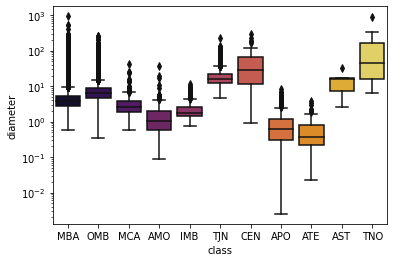

In [ ]:
sns.set_palette('inferno', 11)
sns.boxplot(x='class', y='diameter', data=df)
plt.yscale('log')

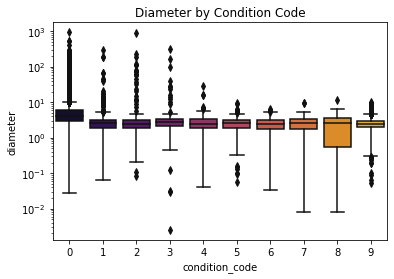

In [ ]:
sns.boxplot(x='condition_code', y='diameter', data=df)
plt.title('Diameter by Condition Code')
plt.yscale('log')

In [ ]:
df.drop('condition_code', axis=1, inplace=True)

In [ ]:
df.shape

(137636, 18)

Heat Map

<AxesSubplot:>

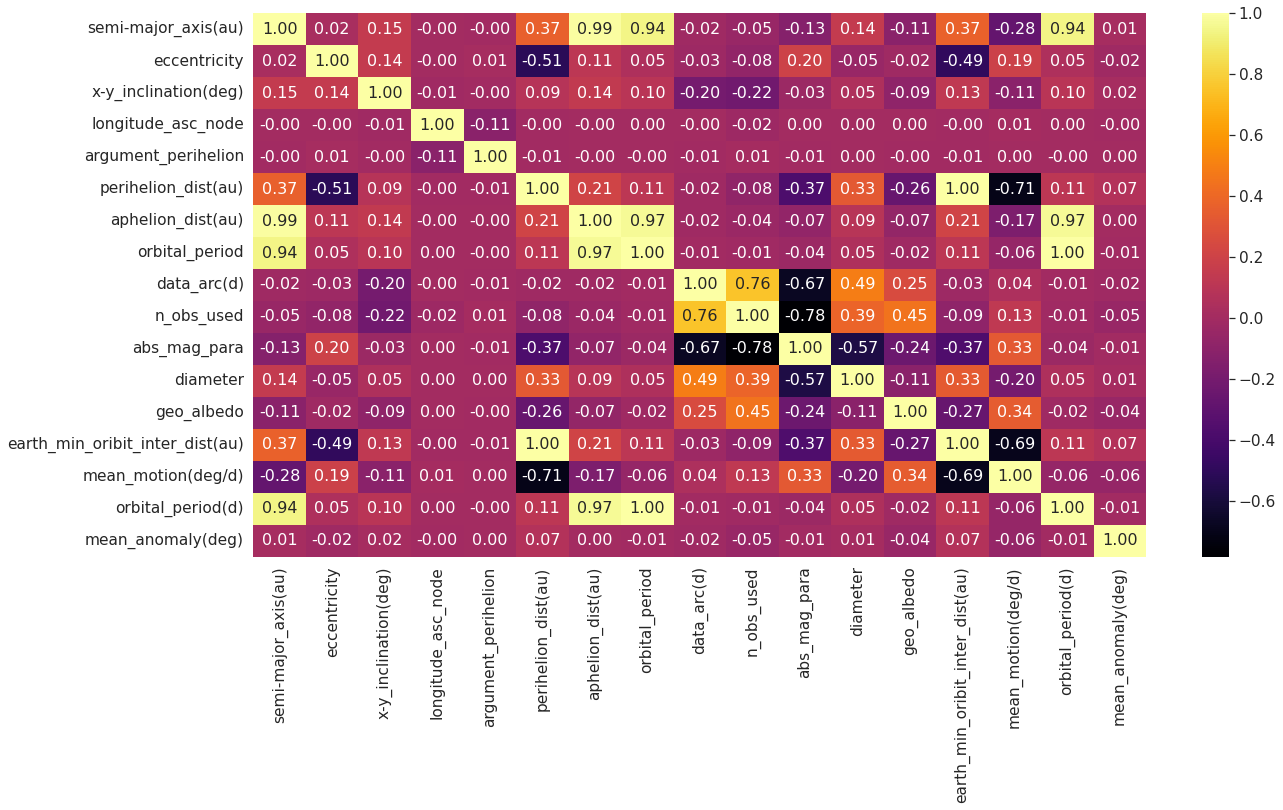

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':16})

In [ ]:
#orbital_period(d) and orbital_period
df.drop('orbital_period', axis=1, inplace=True)

In [ ]:
#perihelion_distance and earth_min_orbit_inter_dist(au)
df.drop('earth_min_oribit_inter_dist(au)', axis=1, inplace=True)

In [ ]:
df.shape

(137636, 16)

In [ ]:
df = pd.get_dummies(df, columns=['class'])

In [ ]:
df.shape

(137636, 26)

In [ ]:
df.columns

Index(['semi-major_axis(au)', 'eccentricity', 'x-y_inclination(deg)',
       'longitude_asc_node', 'argument_perihelion', 'perihelion_dist(au)',
       'aphelion_dist(au)', 'data_arc(d)', 'n_obs_used', 'abs_mag_para',
       'diameter', 'geo_albedo', 'mean_motion(deg/d)', 'orbital_period(d)',
       'mean_anomaly(deg)', 'class_AMO', 'class_APO', 'class_AST', 'class_ATE',
       'class_CEN', 'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB',
       'class_TJN', 'class_TNO'],
      dtype='object')

In [ ]:
df.head()

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),data_arc(d),n_obs_used,abs_mag_para,...,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,8822.0,1002,3.34,...,0,0,0,0,0,1,0,0,0,0
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,72318.0,8490,4.13,...,0,0,0,0,0,1,0,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,72684.0,7104,5.33,...,0,0,0,0,0,1,0,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,24288.0,9325,3.20,...,0,0,0,0,0,1,0,0,0,0
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,63507.0,2916,6.85,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.to_csv('/content/processed_asteroid.csv',index=False)

In [ ]:
new_Data = pd.read_csv('/content/processed_asteroid.csv')

In [ ]:
new_Data.shape

(137636, 26)

Feature Selection(PCA)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(new_Data)

array([[-9.97319690e+01, -1.23694349e+02,  3.39060830e+02, ...,
        -3.51719877e-02,  1.84005785e-11,  4.19925891e-13],
       [-6.91358544e+02,  6.37468665e+04,  3.16194973e+03, ...,
        -3.06271394e-02, -1.89836519e-12, -4.67897722e-14],
       [-7.86729847e+02,  6.40094176e+04,  1.75301857e+03, ...,
        -1.32665327e-02,  4.36690230e-12, -1.67960825e-14],
       ...,
       [ 3.11727160e+02, -6.15770147e+03, -1.77300359e+02, ...,
        -3.38572770e-03,  7.02260679e-13, -6.38194945e-16],
       [ 2.26046253e+02, -6.78931388e+03, -1.52174798e+02, ...,
        -2.80004297e-03,  6.46574877e-13, -1.61605927e-15],
       [-3.59425493e+02, -5.54816497e+03, -2.45704437e+02, ...,
         2.88772320e-04, -1.72268781e-13, -1.22477479e-15]])

In [ ]:
pca.explained_variance_ratio_

array([6.93969838e-01, 3.04564259e-01, 1.21037296e-03, 9.38542238e-05,
       8.50299990e-05, 7.57504442e-05, 5.60356897e-07, 3.22379998e-07,
       7.58710889e-09, 3.01778384e-09, 9.33547898e-10, 7.26879894e-10,
       1.49121908e-10, 6.48584280e-11, 3.89554612e-11, 2.82610193e-11,
       2.26697487e-11, 1.69687053e-11, 1.47561747e-11, 1.01930570e-11,
       2.59552585e-12, 1.91849608e-12, 4.52599771e-13, 1.69479240e-13,
       6.14077205e-33, 2.61940757e-38])

In [ ]:
data = pca.fit_transform(new_Data)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(data)

StandardScaler()

In [ ]:
scaled_data=scaler.transform(data)

In [ ]:
scaled_data

array([[-1.06940135e-02, -2.00210581e-02,  8.70551862e-01, ...,
        -7.63159462e+00,  2.09586105e+01,  2.71922221e+02],
       [-7.41326748e-02,  1.03180115e+01,  8.11842886e+00, ...,
        -6.64545643e+00, -2.18496306e+00, -2.96222100e+01],
       [-8.43591049e-02,  1.03605078e+01,  4.50094333e+00, ...,
        -2.87856349e+00,  4.95829924e+00, -1.02433230e+01],
       ...,
       [ 3.34257361e-02, -9.96680119e-01, -4.55225565e-01, ...,
        -7.34632956e-01,  7.80106309e-01,  1.96268836e-01],
       [ 2.42383832e-02, -1.09891235e+00, -3.90714710e-01, ...,
        -6.07551471e-01,  7.16616874e-01, -4.35528135e-01],
       [-3.85403109e-02, -8.98021080e-01, -6.30855694e-01, ...,
         6.26576269e-02, -2.16976948e-01, -1.82719700e-01]])

In [ ]:
scaled_data.shape

(137636, 26)

In [ ]:
pca.fit(scaled_data)

PCA()

In [ ]:
x_pca=pca.transform(scaled_data)

In [ ]:
x_pca

array([[ 2.07098022e+02,  5.85979001e+01,  1.35567478e+01, ...,
        -3.82656789e+01,  1.07654261e+01,  1.77458071e+02],
       [-2.24910677e+01,  2.94334148e+01,  8.05033778e+00, ...,
        -2.88452214e+01, -3.38221063e+00, -1.94010633e+01],
       [-3.73707614e+00,  1.07244222e+01,  3.19669271e+00, ...,
        -1.10686291e+01, -1.90336754e+00, -1.07491702e+01],
       ...,
       [ 6.90401486e-01,  3.44760508e-01,  2.51863457e-01, ...,
        -1.55457852e+00, -3.11729497e-01, -4.12835437e-01],
       [ 1.98759754e-01, -1.04207593e-01,  5.33757219e-01, ...,
        -1.35994670e+00,  3.74351680e-02, -8.14689549e-01],
       [-2.82628210e-01,  4.55488278e-01,  1.16322661e+00, ...,
        -1.29050312e+00, -1.59524994e+00,  2.42235327e-02]])

A.Data Modelling using various Machine Learning Algorithms (Use Linear, KNN , Support Vector Machining , Random Forest , Gradient Boost, XG Boost) on processed dataset and Obtain performance metric R2 score:

  1. Give little theoritical overview about Error Metrics and R2 metrics.(5 Marks) 

  2. Data Modelling using Linear Regression Algorithm (2 Marks)

  3. Data Modelling using KNN Algorithm (3 Marks)

  4. Data Modelling using Support Vector Machining Algorithm (3 Marks)

  5. Data Modelling using Random Forest Algorithm (2 Marks)

  6. Data Modelling using Gradient Boosting Algorithm (2 Marks)

  7. Data Modelling using XG Boost Algorithm (3 Marks)

  8. Justify the best Model using R2 score (5 Marks)

In [ ]:
from sklearn.model_selection import train_test_split       # To split the dataset into training data and test data..
from sklearn.preprocessing import StandardScaler  

In [ ]:
df = pd.read_csv('/content/processed_asteroid.csv')


In [ ]:
df.head()

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),data_arc(d),n_obs_used,abs_mag_para,...,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,8822.0,1002,3.34,...,0,0,0,0,0,1,0,0,0,0
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,72318.0,8490,4.13,...,0,0,0,0,0,1,0,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,72684.0,7104,5.33,...,0,0,0,0,0,1,0,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,24288.0,9325,3.20,...,0,0,0,0,0,1,0,0,0,0
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,63507.0,2916,6.85,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df.shape

(137636, 26)

In [ ]:
#Linear Regression
y = df['diameter']
X = df.drop(columns='diameter')

In [ ]:
X.shape

(137636, 25)

In [ ]:
y.shape

(137636,)

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
X_std

array([[-0.02984634, -0.89561457,  0.03582764, ..., -0.24023591,
        -0.11748859, -0.0097191 ],
       [-0.02767868,  1.09383293,  3.5825523 , ..., -0.24023591,
        -0.11748859, -0.0097191 ],
       [-0.09552794,  1.43680578,  0.38620394, ..., -0.24023591,
        -0.11748859, -0.0097191 ],
       ...,
       [ 0.21778788,  0.96778974,  1.11446495, ..., -0.24023591,
        -0.11748859, -0.0097191 ],
       [ 0.15545871,  1.83007504,  0.60095756, ..., -0.24023591,
        -0.11748859, -0.0097191 ],
       [-0.26080466, -0.47031763, -0.85200308, ..., -0.24023591,
        -0.11748859, -0.0097191 ]])

In [ ]:
X_std.shape

(137636, 25)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
print('Shape of X and y',X.shape,y.shape )
print('X_train_shape',X_train.shape)
print('X_test_shape',X_test.shape)
print('y_train_shape',y_train.shape)
print('y_test_shape',y_test.shape)

Shape of X and y (137636, 25) (137636,)
X_train_shape (110108, 25)
X_test_shape (27528, 25)
y_train_shape (110108,)
y_test_shape (27528,)


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_pred = Regressor.predict(X_test)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knnPrediction  = model.predict(X_test)

SVM

In [ ]:
# from sklearn.svm import SVR
# model = SVR()
# model.fit(X_train, y_train)

In [ ]:
#svmPrediction  = model.predict(X_test)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rfPrediction  = model.predict(X_test)

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradientregressor = GradientBoostingRegressor(n_estimators=200,learning_rate=0.15)

In [ ]:
model = gradientregressor.fit(X_train, y_train)

#Predict the response for test dataset
gbPrediction = model.predict(X_test)

XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
XGR = XGBRegressor(gamma=10)

In [ ]:
model = XGR.fit(X_train, y_train)

[21:06:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgbPrediction = model.predict(X_test)

R2 SCORE

In [ ]:
from sklearn.metrics import mean_squared_error      #for getting the mean squared error
from sklearn.metrics import r2_score  

In [ ]:
#Linear Regression
r2 = r2_score(y_test,lr_pred)
print("R2 Score : ",r2) 

R2 Score :  0.39235720249583916


In [ ]:
#Knn
r2 = r2_score(y_test,knnPrediction)
print("R2 Score : ",r2) 

R2 Score :  0.4473266415962037


In [ ]:
#Random Forest
r2 = r2_score(y_test,rfPrediction)
print("R2 Score : ",r2) 

R2 Score :  0.9205630399835073


In [ ]:
#Gradient Boost
r2 = r2_score(y_test,gbPrediction)
print("R2 Score : ",r2) 

R2 Score :  0.9484030831701485


In [ ]:
#Xgboost
r2 = r2_score(y_test,xgbPrediction)
print("R2 Score : ",r2) 

R2 Score :  0.9346442727370365


Performing Hyper parameter tuning on every algorithm by using any one of available options such as GridSearch, K-Fold, Randomized Search. 


In [ ]:
data = pd.read_csv('/content/processed_asteroid.csv')

In [ ]:
#Cross Validation for LinearRegresion
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
model=LinearRegression()
kfold_validation=KFold(10)

In [ ]:
results=cross_val_score(model,X_std,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[  0.14378896   0.49453005   0.4624558   -0.24087481   0.45906204
  -0.10336814  -0.98715392  -0.10432825  -2.02721683 -24.84638234]
-2.6749487448792677


In [ ]:
#Cross Validation for KNN
model = KNeighborsRegressor(n_neighbors=5)
kfold_validation=KFold(10)

In [ ]:
results=cross_val_score(model,X_std,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[ 0.18595425  0.50593094  0.90860137  0.88833281  0.85628092  0.82992585
  0.90240386  0.8906378   0.66107324 -0.60885791]
0.6020283124214171


In [ ]:
#Cross validation for Randomforest
model = RandomForestRegressor()
kfold_validation=KFold(10)

In [ ]:
results=cross_val_score(model,X_std,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.87255834 0.93470971 0.97612976 0.96276091 0.97751394 0.9760533
 0.9723452  0.9745985  0.89258763 0.82493256]
0.9364189852025723


In [ ]:
#Cross validation for gradient boost
gradientregressor = GradientBoostingRegressor(n_estimators=200,learning_rate=0.15)

In [ ]:
results=cross_val_score(model,X_std,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.87522142 0.94283266 0.97627932 0.96277977 0.97961452 0.97542649
 0.97237386 0.97406758 0.88964389 0.83172881]
0.93799683194162


In [ ]:
#Cross validation for xgboost
XGR = XGBRegressor(gamma=10)

In [ ]:
results=cross_val_score(model,X_std,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.88570531 0.94030056 0.97658813 0.96280721 0.98088064 0.97525841
 0.97247092 0.97445964 0.89193435 0.82206649]
0.9382471655894056


# Conclusion
From the Cross validation score, XtremeGradientBoost performed well with a score of 93.82 percent.